# Next 3 minutes (approx.) of your presentation -- Core Analysis
Describe the process how we clean the data // For aaron to edit

#### Exploratory Data Analysis

In [2]:
# Importation of libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### Read the data

In [3]:
listings2 = pd.read_csv('datasets/listings_preprocessed.csv')

#### Extract the column headers

In [4]:
# Extract column variable names
column_names = listings2.columns.tolist()

# Print column variable names
print("Column Variable Names:")
for name in column_names:
    print(name)

Column Variable Names:
id
listing_url
scrape_id
last_scraped
source
name
description
neighborhood_overview
picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_rate
host_acceptance_rate
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
neighbourhood
latitude
longitude
accommodates
bathrooms
bathrooms_text
bedrooms
beds
amenities
price
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_nights_avg_ntm
maximum_nights_avg_ntm
calendar_updated
availability_30
availability_60
availability_90
availability_365
calendar_last_scraped
number_of_reviews
number_of_reviews_ltm
number_of_reviews_l30d
first_review
last_review
review_scores_rating
review_scores_accuracy
review_scores_cleanliness
review_scores_checkin
review_scores_communication
review_scores_location
review_scores_value
license
calculated_host_listings_count
calculated_hos

In [12]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Check if data is categorical or numerical
print(listings2.dtypes)

id                                                    int64
listing_url                                          object
scrape_id                                             int64
last_scraped                                         object
source                                               object
name                                                 object
description                                          object
neighborhood_overview                                object
picture_url                                          object
host_id                                               int64
host_url                                             object
host_name                                            object
host_since                                           object
host_location                                        object
host_about                                           object
host_response_rate                                  float64
host_acceptance_rate                    

In [13]:
# Filter out the data that is not numerical
numerical_df = listings2.select_dtypes(include=['int64', 'float64'])
print(numerical_df.head())

        id       scrape_id   host_id  host_response_rate  \
0    71609  20230329174636    367042          100.000000   
1  4007891  20230329174636  12067440          100.000000   
2  4008423  20230329174636  12067440          100.000000   
3  4013186  20230329174636  20049904           90.420715   
4  4017084  20230329174636  20785714           90.420715   

   host_acceptance_rate  host_listings_count  host_total_listings_count  \
0            100.000000                    6                         15   
1             97.000000                   17                         25   
2             97.000000                   17                         25   
3             71.145808                    2                          2   
4             71.145808                    1                          1   

   latitude  longitude  accommodates  bathrooms  bedrooms  beds  price  \
0   1.34537  103.95887             6        NaN       2.0   3.0  137.0   
1   1.31172  103.86011             7    

In [21]:
# Count the number of variables in the numerical_df DataFrame
num_vars = numerical_df.shape[1]
print("Number of variables in numerical_df:", num_vars)

Number of variables in numerical_df: 154


#### Perform Correlation Analysis

In [14]:
# importation of libriaries 

import seaborn as sns
import matplotlib.pyplot as plt

                                                        id  scrape_id  \
id                                                1.000000        NaN   
scrape_id                                              NaN        NaN   
host_id                                           0.422047        NaN   
host_response_rate                                0.070700        NaN   
host_acceptance_rate                              0.094223        NaN   
host_listings_count                               0.027744        NaN   
host_total_listings_count                        -0.004896        NaN   
latitude                                         -0.170788        NaN   
longitude                                        -0.029472        NaN   
accommodates                                      0.043867        NaN   
bathrooms                                              NaN        NaN   
bedrooms                                          0.030219        NaN   
beds                                             -0

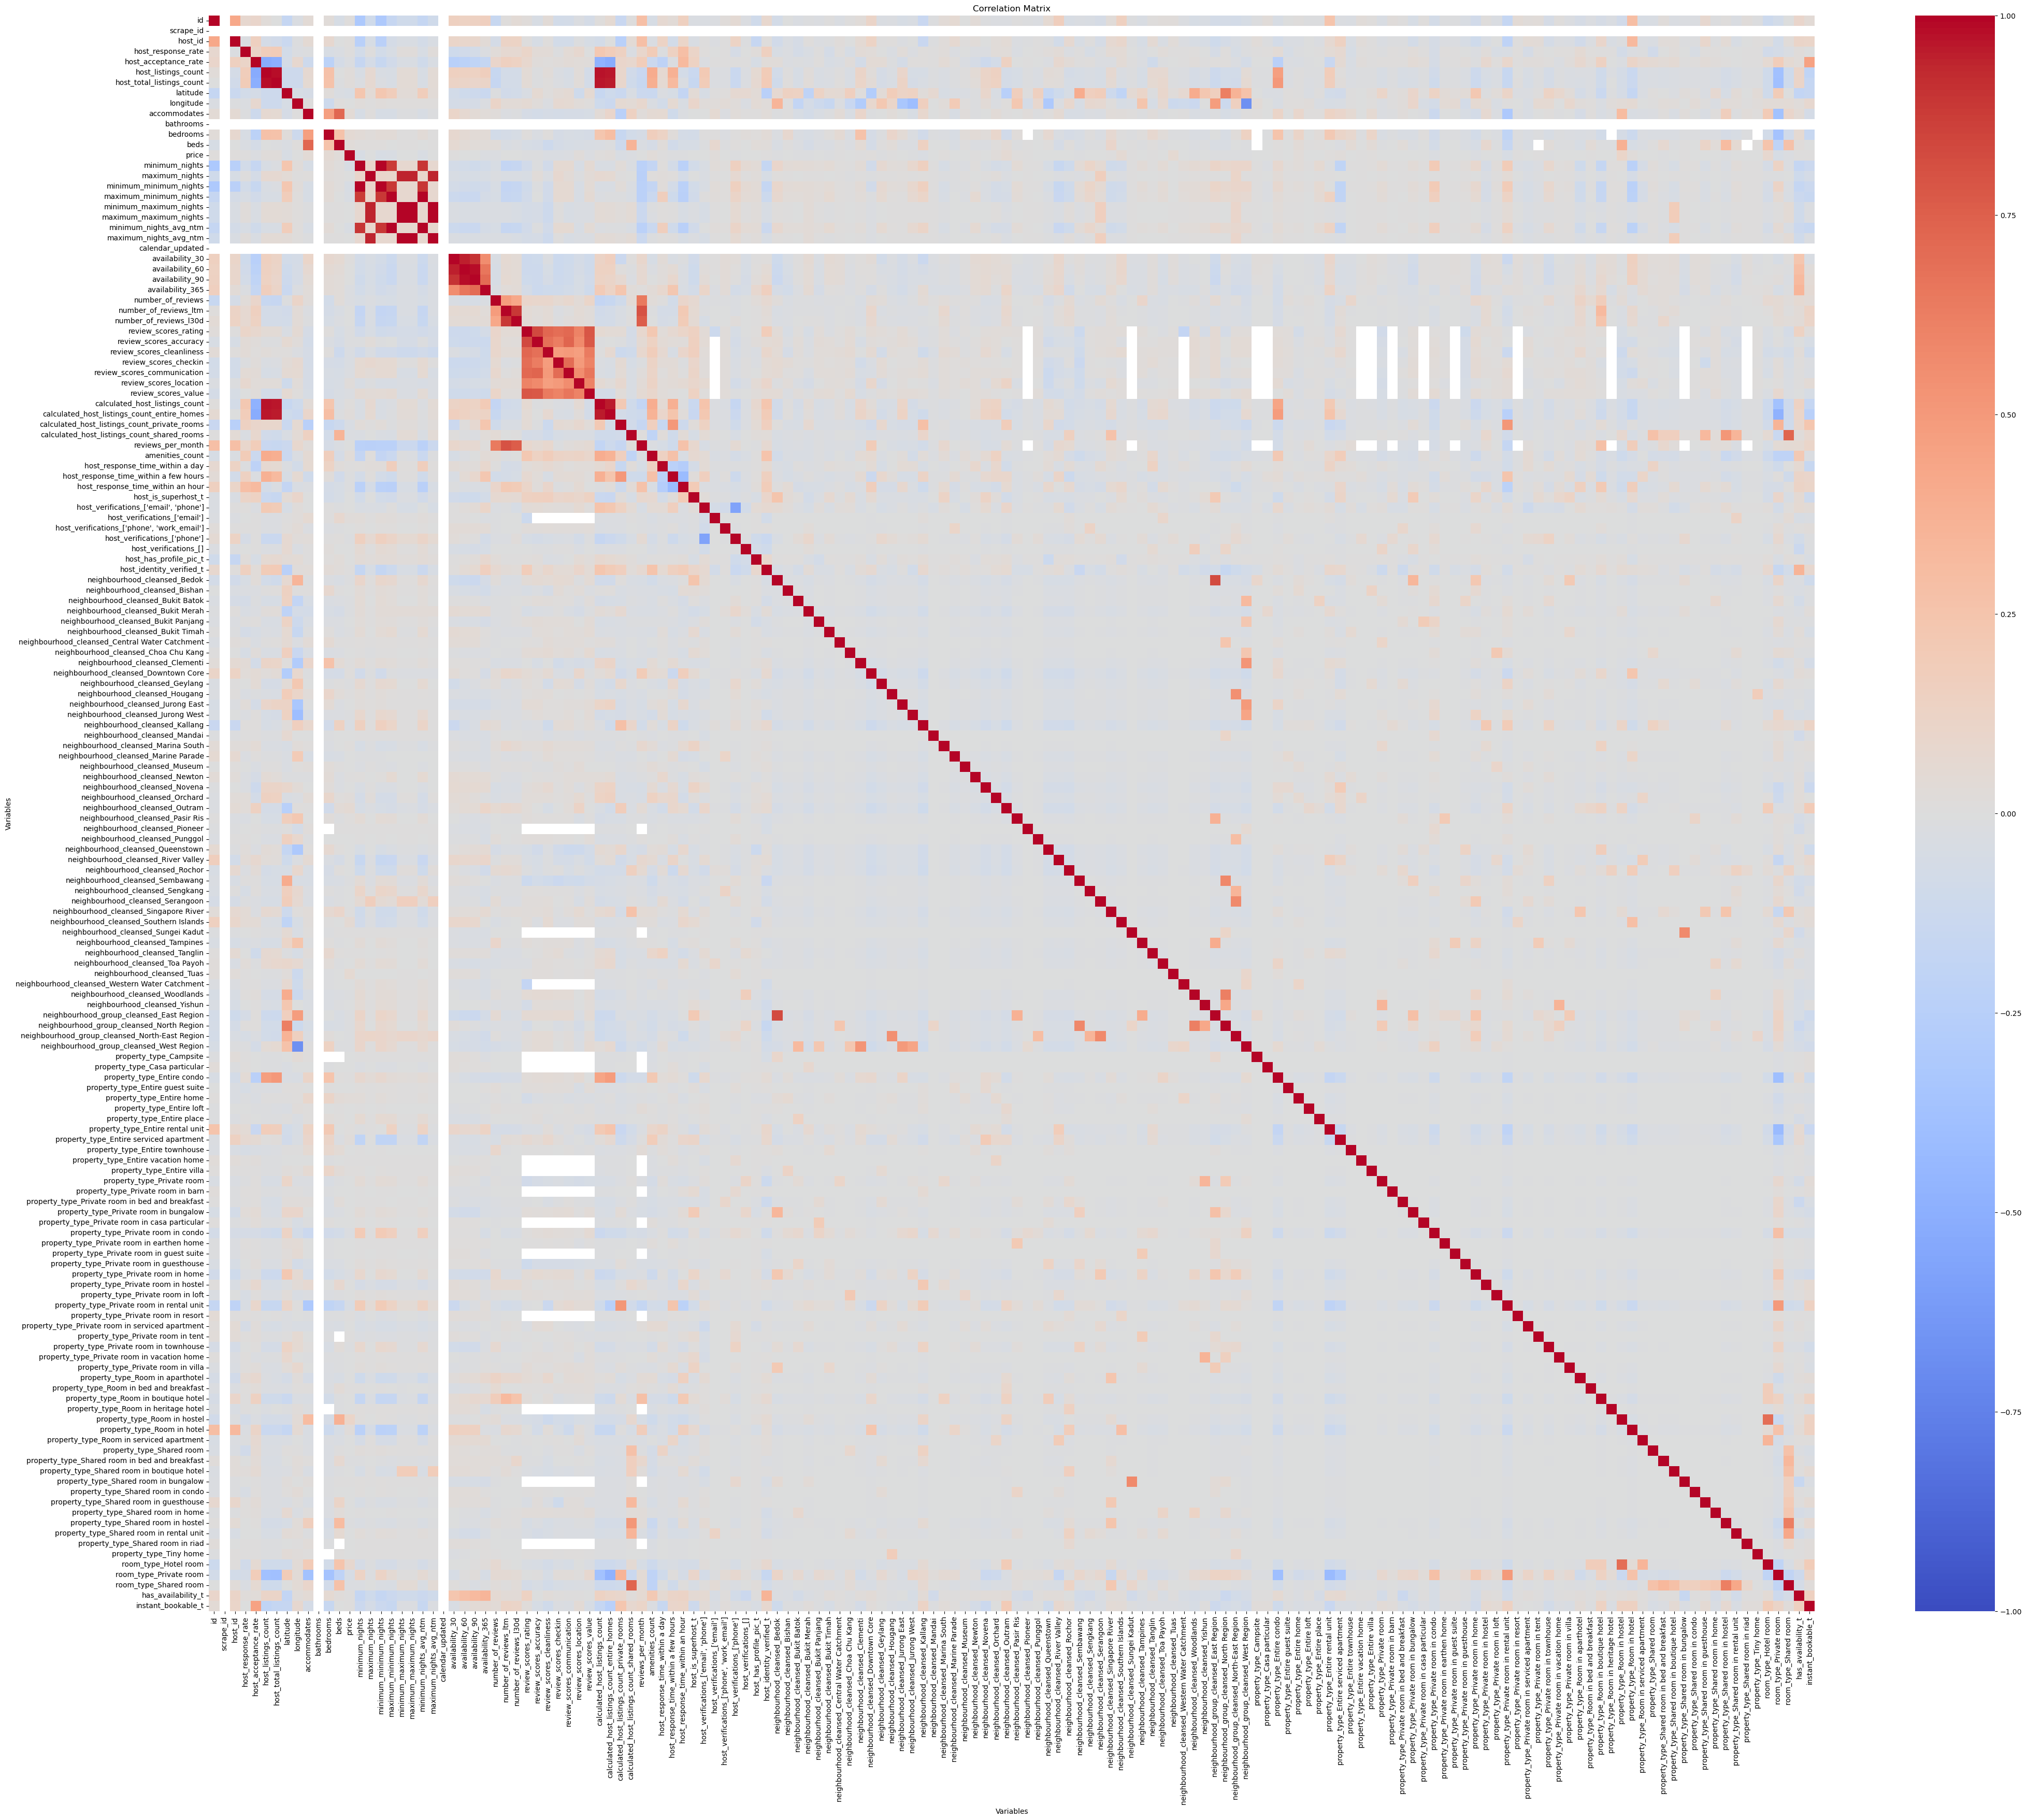

In [24]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Select only numeric columns from the original dataframe
numerical_df = listings2.select_dtypes(include=['int64', 'float64'])

# Display the correlation matrix
correlation_matrix = numerical_df.corr()
print(correlation_matrix)

# Plot the heatmap
fig, ax = plt.subplots(figsize=(50, 40))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=False, cmap='coolwarm')

# Set plot title and axis labels
plt.title('Correlation Matrix')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Save the plot to a file with high resolution
plt.savefig('correlation_matrix.png', dpi=300)

# Show the plot
plt.show()

In [25]:
# Compare the relationship between the 'price' variable and all other variables
price_correlations = correlation_matrix.loc['price'].sort_values(ascending=False)
print(price_correlations)

price                                               1.000000
property_type_Room in hostel                        0.107682
room_type_Hotel room                                0.074486
neighbourhood_cleansed_Tuas                         0.061953
neighbourhood_cleansed_Outram                       0.051106
neighbourhood_cleansed_Southern Islands             0.048707
bedrooms                                            0.048543
accommodates                                        0.045396
amenities_count                                     0.031032
property_type_Entire home                           0.026834
beds                                                0.024769
calculated_host_listings_count_entire_homes         0.019757
property_type_Entire serviced apartment             0.019387
property_type_Room in hotel                         0.019298
host_listings_count                                 0.018724
host_total_listings_count                           0.018142
host_verifications_['ema

In [27]:
# Select only numeric columns from the original dataframe
numerical_df = listings2.select_dtypes(include=['int64', 'float64'])

# Create a scatter plot matrix of the numerical variables
sns.pairplot(numerical_df)
plt.show()